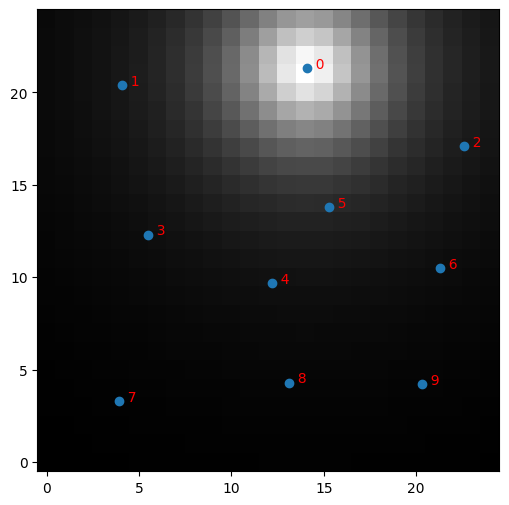

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lamp_positions = np.array([[14.1, 21.3, 3.5],  # [x-pos, y_pos, height]
                           [ 4.1, 20.4, 4.0],  # for 10 lamps
                           [22.6, 17.1, 6.0],  
                           [ 5.5, 12.3, 4.0], 
                           [12.2,  9.7, 4.0], 
                           [15.3, 13.8, 6.0], 
                           [21.3, 10.5, 5.5], 
                           [ 3.9,  3.3, 5.0],
                           [13.1,  4.3, 5.0], 
                           [20.3,  4.2, 4.5]])

N = 25
m = N * N
pix_x = np.arange(0, N).reshape(-1, 1) @ np.ones((1, N))
pix_y = np.ones((N, 1))@np.arange(0, N).reshape(1, -1)
pixels = np.hstack((pix_x.reshape(m, 1), pix_y.reshape(m, 1), np.zeros((m, 1))))

n = 10
lamp_positions = np.array([[14.1, 21.3, 3.5],  # [x-pos, y_pos, height]
                           [ 4.1, 20.4, 4.0],  # for 10 lamps
                           [22.6, 17.1, 6.0],  
                           [ 5.5, 12.3, 4.0], 
                           [12.2,  9.7, 4.0], 
                           [15.3, 13.8, 6.0], 
                           [21.3, 10.5, 5.5], 
                           [ 3.9,  3.3, 5.0],
                           [13.1,  4.3, 5.0], 
                           [20.3,  4.2, 4.5]])

A = np.zeros((m,n))
for i in range(m):
  for j in range(n):
    A[i,j] = 1.0 / np.linalg.norm(pixels[i,:]-lamp_positions[j,:])**2
A *= m / np.sum(A)

x_ex = np.zeros(n)
x_ex[0] = 3
y_ex = A.dot(x_ex)

plt.figure(figsize=(8,6), dpi=100)
plt.imshow(y_ex.reshape(N, N).T, cmap='gray', origin='lower')
plt.plot(lamp_positions[:, 0], lamp_positions[:, 1], 'o')
for i in range(n):
  plt.text(lamp_positions[i,0],lamp_positions[i,1], f"  {i}", color="r" )
plt.show()

[[-0.33811258]
 [-0.01640042]
 [-0.43925389]
 [-0.22173528]
 [ 1.50605872]
 [ 3.08020199]
 [-1.28668479]
 [ 0.06790363]
 [-1.16525726]
 [ 0.37032427]]


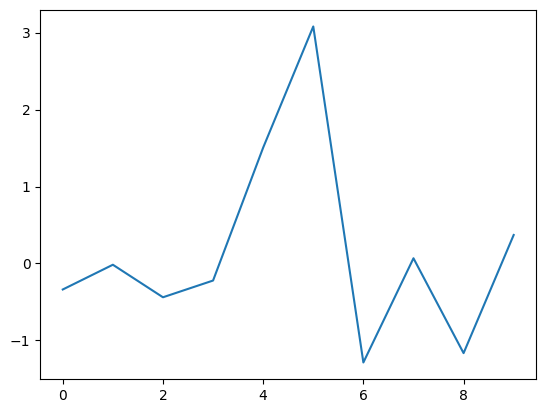

In [4]:
center = np.array([12.5, 12.5])
radius = 5.0
y_des = np.zeros(m)

for i in range(m):
    pix_pos = pixels[i, :2]  # (x, y)
    dist = np.linalg.norm(pix_pos - center)
    if dist < radius:
        y_des[i] = 1.0
    else:
        y_des[i] = 0.1

y_des = y_des.reshape(-1, 1)

# y_des = np.ones(m)
x_hat = np.linalg.lstsq(A, y_des, rcond=None)

print(x_hat[0])

plt.plot(x_hat[0])
plt.show()

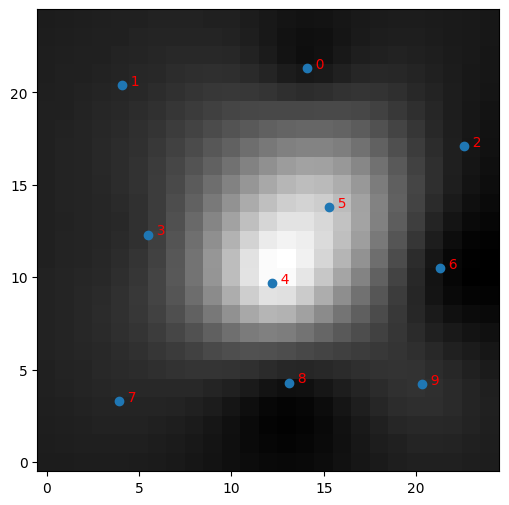

In [5]:
y_optim = A @ x_hat[0]

plt.figure(figsize=(8,6), dpi=100)
plt.imshow(y_optim.reshape(N, N).T, cmap='gray', origin='lower')
plt.plot(lamp_positions[:, 0], lamp_positions[:, 1], 'o')
for i in range(n):
  plt.text(lamp_positions[i,0],lamp_positions[i,1], f"  {i}", color="r" )
plt.show()